In [1]:
from pprint import pprint
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train')
test_data = fetch_20newsgroups(subset='test')

pprint(train_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


Train data shape: 11314
Test data shape: 7532
Classes:
[    'alt.atheism',
     'comp.graphics',
     'comp.os.ms-windows.misc',
     'comp.sys.ibm.pc.hardware',
     'comp.sys.mac.hardware',
     'comp.windows.x',
     'misc.forsale',
     'rec.autos',
     'rec.motorcycles',
     'rec.sport.baseball',
     'rec.sport.hockey',
     'sci.crypt',
     'sci.electronics',
     'sci.med',
     'sci.space',
     'soc.religion.christian',
     'talk.politics.guns',
     'talk.politics.mideast',
     'talk.politics.misc',
     'talk.religion.misc']


Text(0.5, 1.0, 'Test data label distribution')

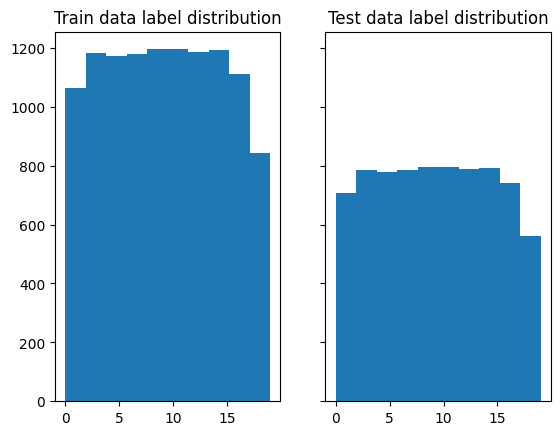

In [2]:
import matplotlib.pyplot as plt
print(f'Train data shape: {len(train_data.data)}')
print(f'Test data shape: {len(test_data.data)}')
print(f'Classes:')
pprint(train_data.target_names, width=1, indent=5)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.hist(train_data.target)
ax1.set_title('Train data label distribution')
ax2.hist(test_data.target)
ax2.set_title('Test data label distribution')

Train data shape: 12000
Test data shape: 7980


Text(0.5, 1.0, 'Test data label distribution')

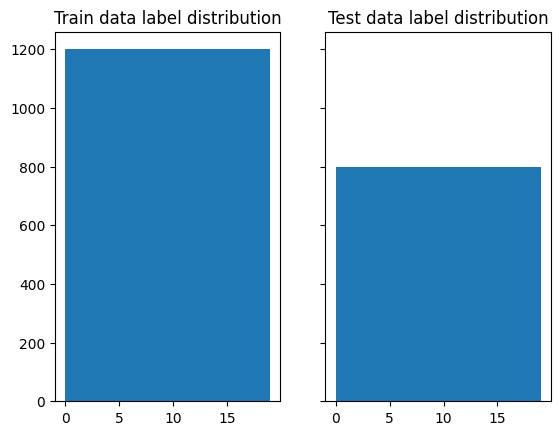

In [3]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

train_data_X = np.array(train_data.data)[..., np.newaxis]
train_data_y = np.array(train_data.target)
test_data_X = np.array(test_data.data)[..., np.newaxis]
test_data_y = np.array(test_data.target)

sampler = RandomOverSampler(sampling_strategy='not majority')
train_data_X, train_data_y = sampler.fit_resample(train_data_X, train_data_y)
test_data_X, test_data_y = sampler.fit_resample(test_data_X, test_data_y)

print(f'Train data shape: {len(train_data_X)}')
print(f'Test data shape: {len(test_data_X)}')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
ax1.hist(train_data_y)
ax1.set_title('Train data label distribution')
ax2.hist(test_data_y)
ax2.set_title('Test data label distribution')

In [4]:
index = 10000
print('   Class:')
print(f'{train_data.target[index]} ({train_data.target_names[train_data.target[index]]})')
print('   Data:')
print(train_data.data[index])

   Class:
7 (rec.autos)
   Data:
From: a207706@moe.dseg.ti.com (Robert Loper)
Subject: Re: SHO and SC
Nntp-Posting-Host: sun278.dseg.ti.com
Organization: Forest Lane Design Center
Lines: 42

In article <C5L8rE.28@constellation.ecn.uoknor.edu> callison@uokmax.ecn.uoknor.edu (James P. Callison) writes:
>In article <1993Apr15.232412.2261@ganglion.ann-arbor.mi.us> david@ganglion.ann-arbor.mi.us (David Hwang) writes:
>>In article <5214@unisql.UUCP> wrat@unisql.UUCP (wharfie) writes:
>>>In article <chrissC587qB.D1B@netcom.com> chriss@netcom.com (Chris Silvester) writes:
>>>
>
>Why anyone would order an SHO with an automatic transmission is
>beyond me; if you can't handle a stick, you should stick with a
>regular Taurus and leave the SHO to real drivers. That is not to
>say that there aren't real drivers who can't use the stick (eg
>disabled persons), but they aren't in any position to use an
>SHO anyway. 
>
>I would be willing to bet that if we removed the automatic
>transmissions from all "

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords

# bayes_model_base = Pipeline([
#     ('vec', CountVectorizer()),
#     ('cls', MultinomialNB())
# ])
# param_grid = {
#     'vec__token_pattern': [r'(?u)\b[^\d\W]{2,}\b', r'(?u)\b\w\w+\b'],
#     'vec__ngram_range': [(1, 1), (1, 2)],
#     'vec__binary': [True, False],
#     'vec__stop_words': [None, stopwords.words('english')],
#     'vec__max_features': [None, 1000, 5500, 10000],
# }
# bayes_model = GridSearchCV(bayes_model_base, param_grid, cv=5, n_jobs=8).fit(train_data_X[:,0], train_data_y)
# pprint(bayes_model.best_params_)

bayes_model = Pipeline([
    ('vec', CountVectorizer(ngram_range=(1, 2), binary=True, stop_words=stopwords.words('english'))),
    ('cls', MultinomialNB())
])
bayes_model.fit(train_data_X[:,0], train_data_y)

score = bayes_model.score(test_data_X[:,0], test_data_y)
print(f'Accuracy score: {score}')

Accuracy score: 0.8050125313283208


In [6]:
import spacy

gpu_activated = spacy.prefer_gpu()
nlp = spacy.load('en_core_web_sm', enable=['tagger', 'attribute_ruler', 'lemmatizer'])

print(f'spaCy version: {spacy.__version__}')
print(f'Using GPU: {gpu_activated}')
print(f'Pipeline: {nlp.pipe_names}')

spaCy version: 3.5.3
Using GPU: False
Pipeline: ['tagger', 'attribute_ruler', 'lemmatizer']


In [7]:
# import pickle
# import os

# train_corpora_file = 'Data/20_newsgroup_train_docs.pkl'

# rewrite = False
# # rewrite = True
# train_corpora = None

# if not os.path.exists(train_corpora_file) or rewrite:
#     train_corpora = list(nlp.pipe(train_data_X[:,0].tolist()))
#     with open(train_corpora_file, 'wb') as file:
#         pickle.dump(train_corpora, file)
#     print('Documents were exported')
# else:
#     print('Documents already exist')

In [8]:
# if train_corpora is None:
#     with open(train_corpora_file, 'rb') as file:
#         train_corpora = pickle.load(file)
# print(f'Length: {len(train_corpora)}')
# print(f'Type: {type(train_corpora[0])}\n')
# print(train_corpora[0].text)

In [9]:
from spacy.tokens import Token

train_docs = nlp.pipe(train_data_X[:,0].tolist())
test_docs = nlp.pipe(test_data_X[:,0].tolist())

def is_useful_token(t: Token):
    return t.is_alpha and not t.is_stop and not t.like_num

train_corpora = [[token.lemma_ for token in doc if is_useful_token(token)] for doc in train_docs]
test_corpora = [[token.lemma_ for token in doc if is_useful_token(token)] for doc in test_docs]
print(len(train_corpora))
print(type(train_corpora[0]))
print(type(train_corpora[0][0]))
print(train_corpora[:5])

12000
<class 'list'>
<class 'str'>
[['thing', 'subject', 'car', 'nntp', 'posting', 'host', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'late', 'early', 'called', 'bricklin', 'doors', 'small', 'addition', 'bumper', 'separate', 'rest', 'body', 'know', 'tellme', 'model', 'engine', 'specs', 'years', 'production', 'car', 'history', 'info', 'funky', 'looking', 'car', 'e', 'mail', 'thanks', 'il', 'brought', 'neighborhood', 'lerxst'], ['guy', 'kuo', 'subject', 'si', 'clock', 'poll', 'final', 'summary', 'final', 'si', 'clock', 'reports', 'keywords', 'si', 'acceleration', 'clock', 'upgrade', 'article', 'organization', 'university', 'washington', 'lines', 'nntp', 'posting', 'host', 'fair', 'number', 'brave', 'souls', 'upgraded', 'si', 'clock', 'oscillator', 'shared', 'experiences', 'poll', 'send', 'brief', 'message', 'detailing', 'experiences', 'procedure', 'speed', 'attained', 'cpu', 'rate

In [10]:
from gensim.models import word2vec
print('C compiler found' if word2vec.FAST_VERSION else 'NO C compiler found!')

NO C compiler found!


In [11]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_corpora)]
doc2vec_model = Doc2Vec(documents=documents, vector_size=100, workers=8, negative=1, dm_mean=1, epochs=10)
print(f'Inference result: {doc2vec_model.infer_vector(test_corpora[0])}')

Inference result: [ 1.60565643e-04 -2.54385006e-02  4.58976068e-02 -4.65729311e-02
  8.08974206e-02 -7.78475702e-02 -5.55379465e-02  4.11461405e-02
 -4.74229604e-02  1.27237692e-01  2.64122244e-02 -4.86640520e-02
  6.77273348e-02  1.15405746e-01 -2.82242987e-02 -1.05129737e-04
 -1.82051212e-02 -3.35186049e-02 -1.35114808e-02 -5.10616899e-02
  2.65852790e-02 -4.74513210e-02  1.09535061e-01 -5.83330682e-03
 -8.99568498e-02 -7.23604113e-02  1.15798272e-01 -3.14634629e-02
 -7.62213320e-02 -9.46107358e-02 -2.60016378e-02  7.48756528e-02
  5.96191473e-02 -1.38297290e-01  2.32010260e-02 -2.97213104e-02
  1.62780029e-03 -1.07495435e-01  6.80685490e-02 -4.33349684e-02
 -7.45047927e-02 -7.69202635e-02  1.97227695e-03  1.88481864e-02
  6.91981465e-02 -3.52057256e-02 -7.07721785e-02  2.67013051e-02
  2.50602327e-02  4.02428024e-02 -2.48866975e-02  1.30683221e-02
  5.23072965e-02 -2.08412949e-02 -8.53446126e-02  4.15019877e-02
  1.85185112e-02  4.18922678e-02  7.51319826e-02 -4.58448268e-02
  7.909

In [12]:
from multiprocessing import Pool

with Pool(processes=16) as pool:
    train_corpora_vecs = pool.map(doc2vec_model.infer_vector, train_corpora)
    test_corpora_vecs = pool.map(doc2vec_model.infer_vector, test_corpora)

train_corpora_vecs = np.array(train_corpora_vecs)
test_corpora_vecs = np.array(test_corpora_vecs)

print(train_corpora_vecs.shape)
print(test_corpora_vecs.shape)

(12000, 100)
(7980, 100)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()
train_corpora_vecs = scaler.fit_transform(train_corpora_vecs)
test_corpora_vecs = scaler.transform(test_corpora_vecs)

# param_grid = {
#     'C': np.logspace(1e-5, 10, 5),
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     # 'decision_function_shape': ['ovo', 'ovr'],
# }
# doc2vec_classifier = GridSearchCV(SVC(max_iter=100), param_grid=param_grid, n_jobs=16).fit(train_corpora_vecs, train_data_y)
# pprint(doc2vec_classifier.best_params_)

doc2vec_classifier = SVC()
doc2vec_classifier.fit(train_corpora_vecs, train_data_y)

train_accuracy = doc2vec_classifier.score(train_corpora_vecs, train_data_y)
test_accuracy = doc2vec_classifier.score(test_corpora_vecs, test_data_y)
print(f'Train accuracy: {train_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Train accuracy: 0.7105
Test accuracy: 0.5711779448621553
